# EE5110 Sensing and Perception
This workbook provides a basic overview of standard image processing operations, including filtering and edge detection.


In [2]:
# if running for the first time, install some of the libraries. Skip if this has been done previously
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

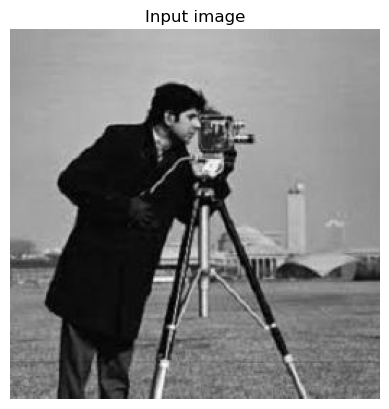

In [4]:
# open test file, plot the example
img = cv2.imread('cameraman.png')
plt.figure()
plt.imshow(img)
plt.title('Input image')
plt.axis('off')
plt.show()

## Averaging filter
In this example, we will apply a basic averaging filter with opencv.
Note: there are multiple ways of implementing filters with other libraries such as skimage, but for simplicity, we will use opencv in this example

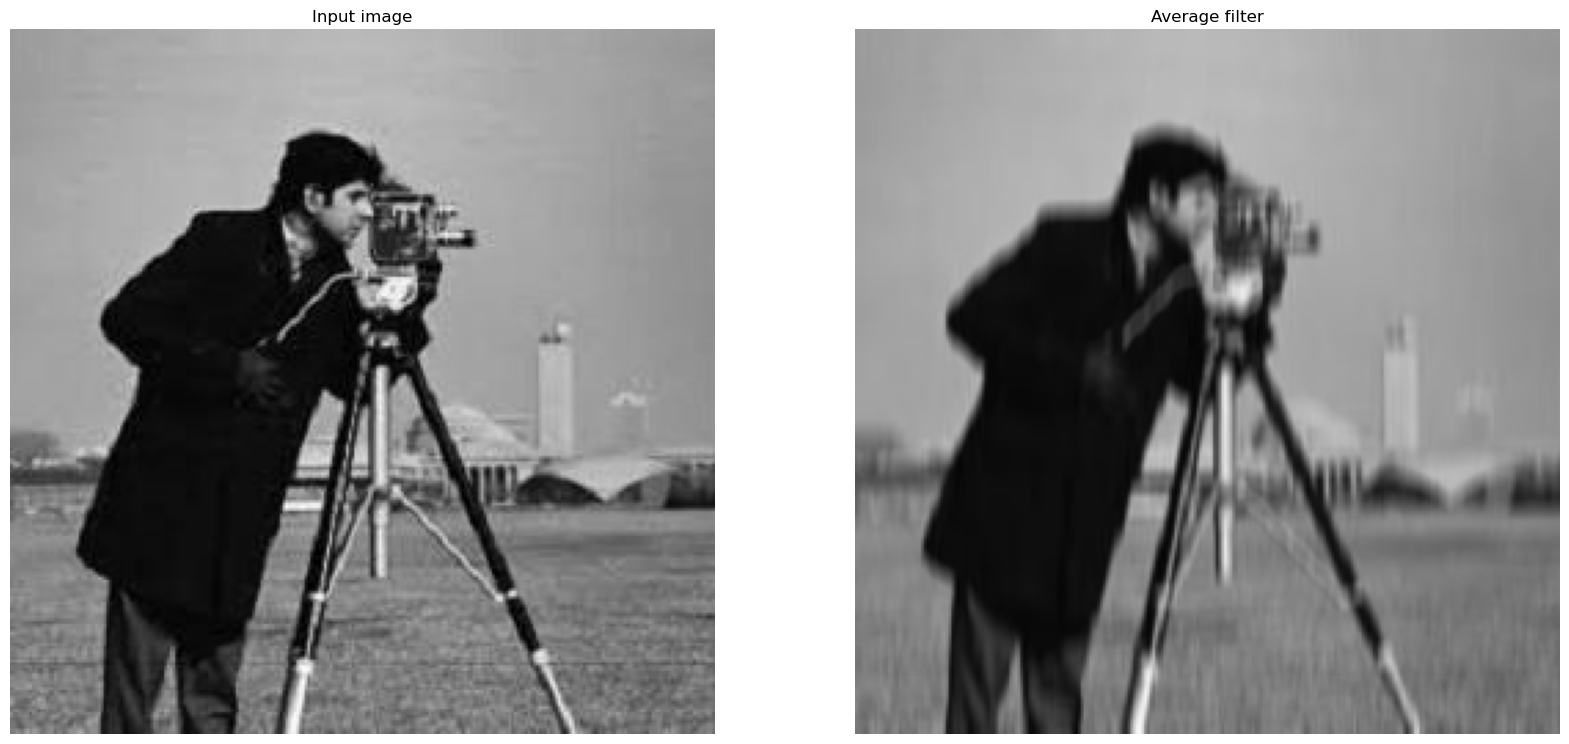

In [32]:
# Define kernel size (e.g., 5x5)
kernel_size = (1, 9)

# Apply the averaging filter
img_avg = cv2.blur(img, kernel_size)

# show results
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Input image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_avg)
plt.title('Average filter')
plt.axis('off')
plt.show()


## Gaussian filter
In this next example, we will run a basic Gaussian filter

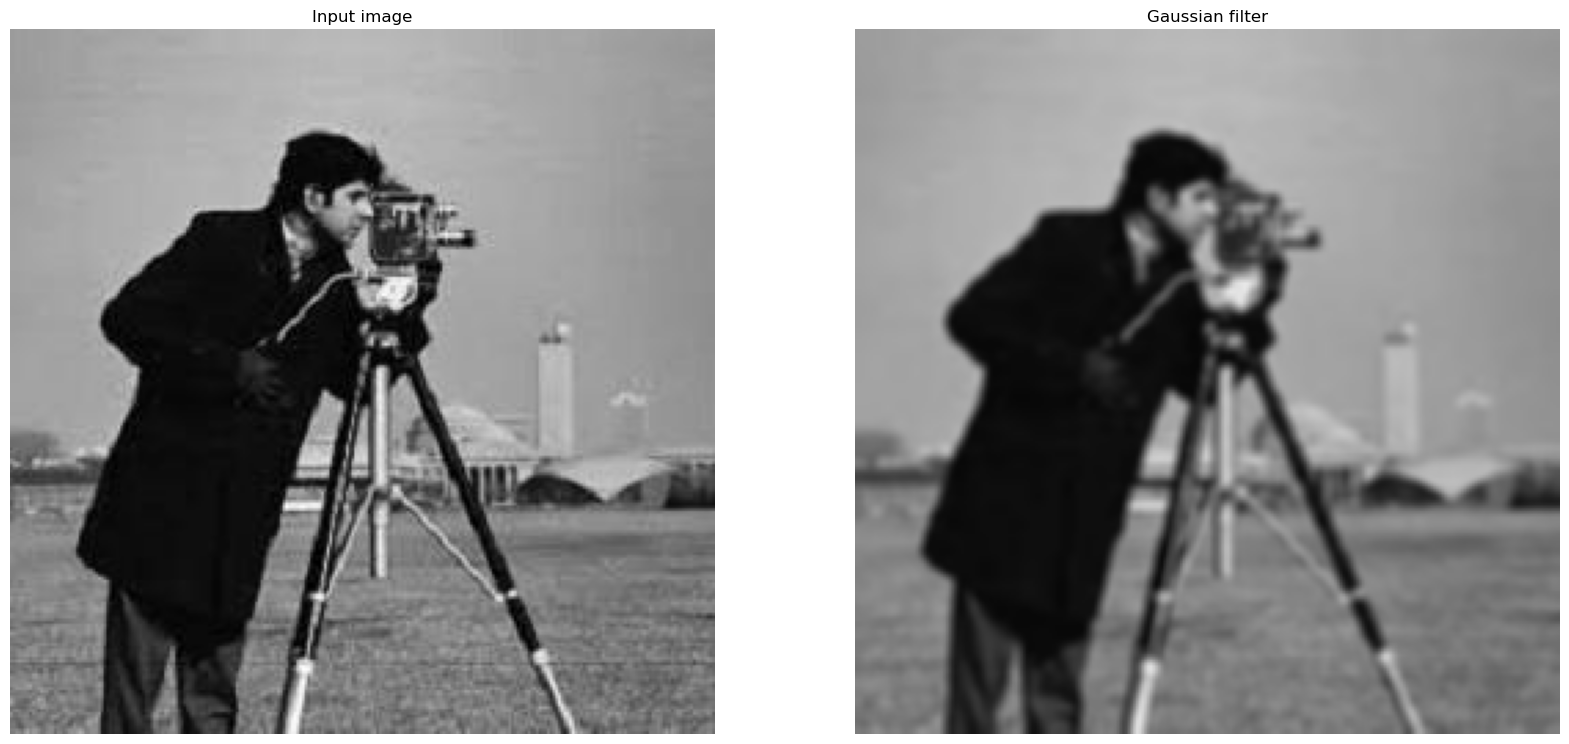

In [38]:
# Define kernel size (e.g., 5x5)
kernel_size = (5, 5)

# Define kernel size and standard deviation for Gaussian blur
kernel_size = (5, 5)  # Kernel size should be odd (e.g., 3, 5, 7)
sigma = 2.0  # Standard deviation; higher values increase the blur

# Apply the Gaussian filter
img_gauss = cv2.GaussianBlur(img, kernel_size, sigma)

# show results
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Input image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_gauss)
plt.title('Gaussian filter')
plt.axis('off')
plt.show()

# Edge enhancement
Very common operation, particularly in photo editing. Use with caution in machine vision applications, as excessive edge enhancement can cause significant noise and edge detection issues.

In this example, we will implement unsharp masking with opencv

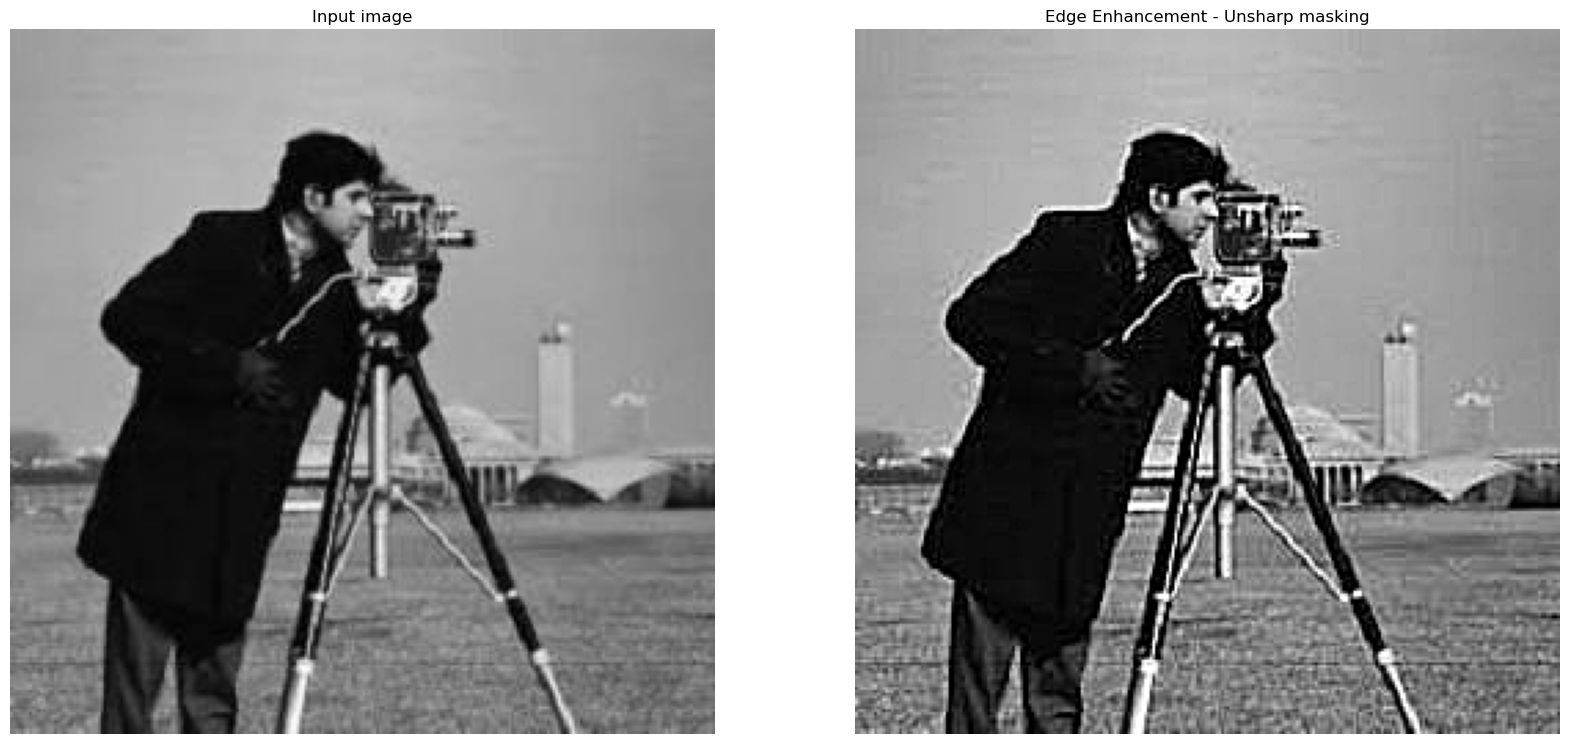

In [10]:
# Define parameters for unsharp masking
kernel_size = (5, 5)  # Size of the Gaussian kernel for blurring
sigma = 1.5           # Standard deviation for Gaussian blur
strength = 1.5        # Strength of sharpening effect

# Step 1: Apply Gaussian Blur to create the mask
img_blur = cv2.GaussianBlur(img, kernel_size, sigma)

 # Step 2: Use addWeighted to combine original and blurred images
# The formula here is: output = original * (1 + strength) - blurred * strength
img_usmask = cv2.addWeighted(img, 1 + strength, img_blur, -strength, 0)

# show results
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Input image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_usmask)
plt.title('Edge Enhancement - Unsharp masking')
plt.axis('off')
plt.show()

# Canny Edge Detection
In this example, we will implement Canny edge detection using opencv

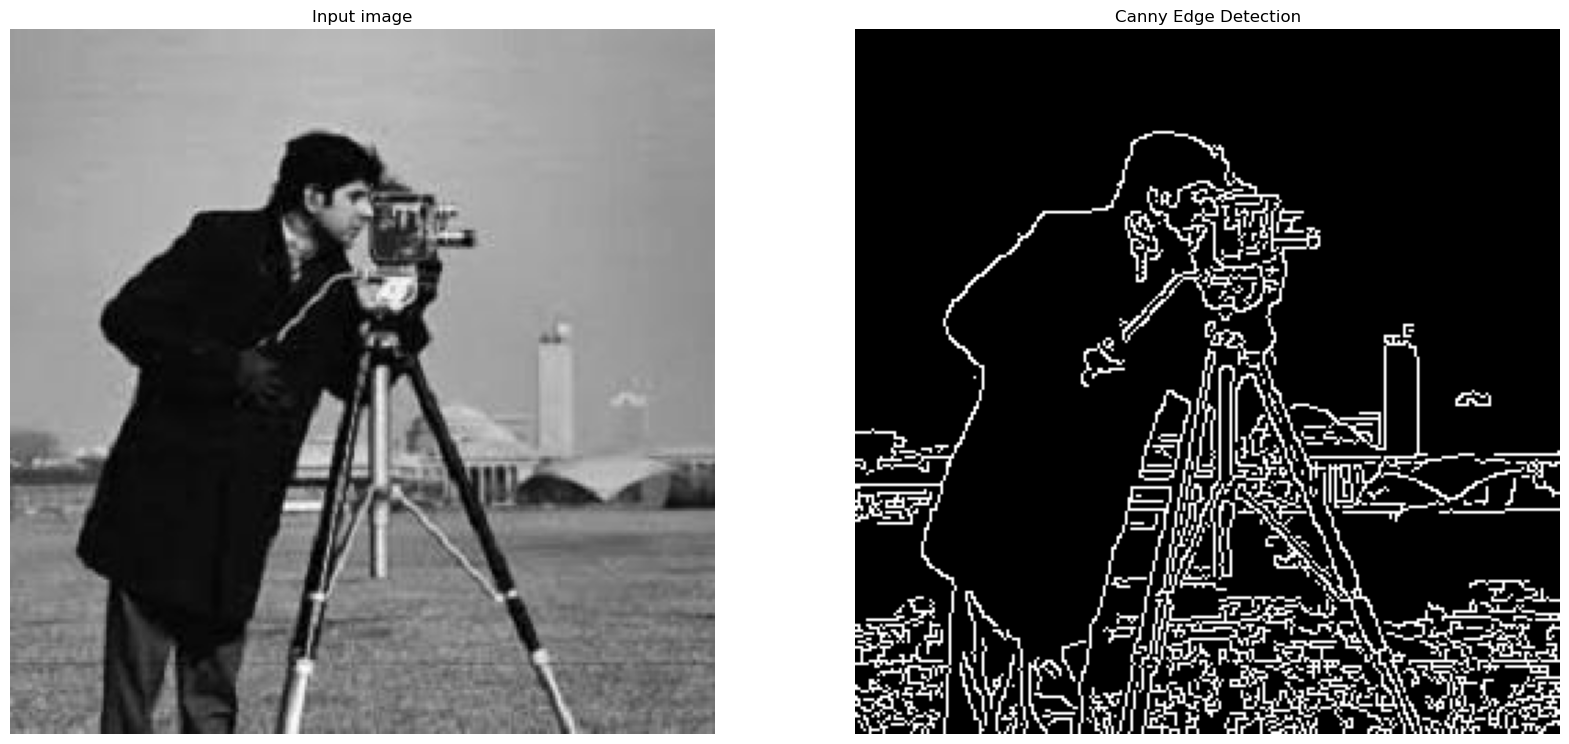

In [12]:
 # Set thresholds for Canny edge detection
lower_threshold = 50
upper_threshold = 150

# Apply Canny edge detection
edges = cv2.Canny(img, lower_threshold, upper_threshold)

# show results
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Input image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

# Denoise: the bilateral Filter
In this example, we will implement a slightly more advanced noise removal filter called the bilateral noise filter. This is an edge preserving noise filter that performs quite well in most conditions. It is slightly computationally expensive, but a good first choice noise filter

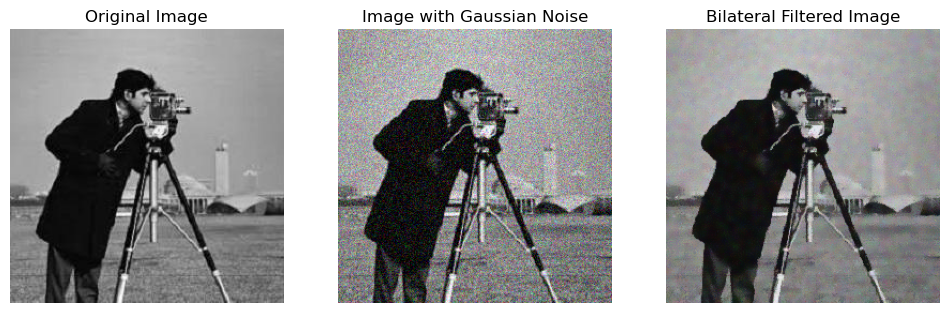

In [14]:
# Add Gaussian noise
mean = 0
stddev = 25  # Standard deviation of noise
gaussian_noise = np.random.normal(mean, stddev, img.shape).astype(np.float32)
noisy_image = cv2.add(img.astype(np.float32), gaussian_noise)
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # Clip values to valid range

# Apply bilateral filter
d = 9               # Diameter of the pixel neighborhood
sigmaColor = 75     # Filter sigma in color space
sigmaSpace = 75     # Filter sigma in coordinate space
bilateral_filtered_image = cv2.bilateralFilter(noisy_image, d, sigmaColor, sigmaSpace)

# Plot the original, noisy, and filtered images
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy image
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')

# Bilateral filtered image
plt.subplot(1, 3, 3)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title("Bilateral Filtered Image")
plt.axis('off')

plt.show()

# Corner Detection
In this example, we will implement Harris Corner Detection using opencv

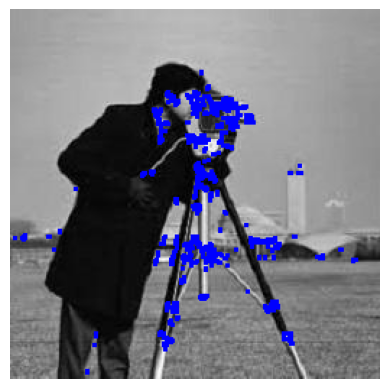

In [26]:
# path to input image specified and  
# image is loaded with imread command 
image = cv2.imread('cameraman.png') 
  
# convert the input image into 
# grayscale color space 
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# modify the data type 
# setting to 32-bit floating point 
operatedImage = np.float32(operatedImage) 
  
# apply the cv2.cornerHarris method 
# to detect the corners with appropriate 
# values as input parameters 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 
  
# Results are marked through the dilated corners 
dest = cv2.dilate(dest, None) 
  
# Reverting back to the original image, 
# with optimal threshold value 
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

plt.imshow(image)

plt.axis('off')
plt.show()
# the window showing output image with corners 
#cv2.imshow('Image with Borders', image) 
  
# De-allocate any associated memory usage  
#if cv2.waitKey(0) & 0xff == 27: 
#    cv2.destroyAllWindows() 